In [1]:
import numpy as np
import pandas as pd
import random
import math
from statistics import mean

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

sns.set(rc={'figure.figsize':(5,5)})

In [2]:
SIZE_OF_DATA=300
ORIGINAL_CENTER_NUMBER=4

In [3]:
def euclidian_distance(centers,data_row):
    distances=[]
    for i in range(len(centers)):
        center=centers.iloc[i]
        distances.append(math.sqrt((center['x']-data_row['x'])**2 + (center['y']-data_row['y'])**2))
        min_distance=min(distances)
    return min_distance, distances.index(min_distance)

In [4]:
def objective_function(centers,data_rows):
    for i in range(len(centers)):
        center=centers.iloc[i]

# Creating Dataset

#### To create a difficult dataset, the comment on the df initialization lines should be swapped 

In [5]:
X, y = make_blobs(n_samples=300, centers=ORIGINAL_CENTER_NUMBER, n_features=2, cluster_std=1)
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=ORIGINAL_CENTER_NUMBER)

df = pd.DataFrame(X, columns =['x', 'y'])
#df = pd.DataFrame(X1, columns =['x', 'y'])

# Used functions

### assigning the data 

In [6]:
#df[['distance', 'center']] = df.apply(lambda row: euclidian_distance(centers,row), axis=1, result_type="expand")

### moving centers

In [7]:
#centers[['x','y']]=df.groupby('center').mean()[['x','y']]

### calculating the objective function

In [8]:
#objective_val=df.groupby('center').sum()['distance'].sum()

# Finding the best K

In [9]:
def whole_work(K):


    centers=df.sample(n=K).reset_index().drop('index',axis=1)
    centers['center']='centroid'
    first_centers=centers.copy(deep=True)
    
    df[['distance', 'center']] = df.apply(lambda row: euclidian_distance(centers,row), axis=1, result_type="expand")
    centers[['x','y']]=df.groupby('center').mean()[['x','y']]
    
    obj_val=df.groupby('center').sum()['distance'].sum()
    obj_vals=[obj_val]
    obj_val_difference=100
    while obj_val_difference>0.000001:
        df[['distance', 'center']] = df.apply(lambda row: euclidian_distance(centers,row), axis=1, result_type="expand")

        centers[['x','y']]=df.groupby('center').mean()[['x','y']]
        next_obj_val=df.groupby('center').sum()['distance'].sum()
        obj_val_difference=abs(obj_val-next_obj_val)
        obj_val=next_obj_val
        obj_vals.append(obj_val)
    
    return obj_val,first_centers

In [10]:
different_K_obj_vals=[]
different_initial_centers=[]
for i in range(10):
    vals=[]
    initial_centers_list=[]
    for j in range(3):
        obj_val,initial_centers=whole_work(i+1)
        vals.append(obj_val)
        initial_centers_list.append(initial_centers)
    min_obj=min(vals)
    min_index=vals.index(min_obj)
    different_K_obj_vals.append(min(vals))    
    different_initial_centers.append(initial_centers_list[min_index])
    

In [11]:
#different_K_obj_vals
#different_initial_centers

Text(0, 0.5, 'Objective Value')

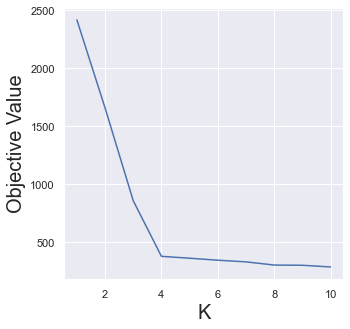

In [12]:
p=sns.lineplot(x=[a+1 for a in list(range(len(different_K_obj_vals)))],y=different_K_obj_vals)
p.set_xlabel("K", fontsize = 20)
p.set_ylabel("Objective Value", fontsize = 20)

In [13]:
def find_elbow(obj_vals):
    for i,obj_val in enumerate(obj_vals):
        last_slope= (obj_val-obj_vals[-1]) / (len(obj_vals)-1-i)
        first_slope=(obj_val-obj_vals[i+1])
        if abs(first_slope-last_slope) < obj_vals[-1]/(2*len(obj_vals)):
            print(last_slope)
            print(first_slope)
            return i+1

# Start

In [14]:
K=find_elbow(different_K_obj_vals)
centers=different_initial_centers[K-1]

15.308046191950135
16.333779867999624


<AxesSubplot:xlabel='x', ylabel='y'>

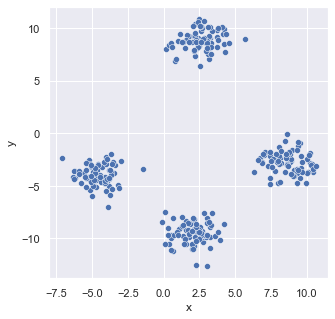

In [15]:
sns.scatterplot(x='x',y='y',data=df)

# Layout Before Start

<AxesSubplot:xlabel='x', ylabel='y'>

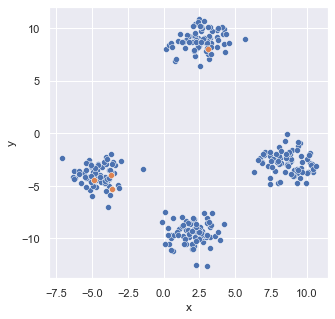

In [16]:
sns.scatterplot(x='x',y='y',data=df)
sns.scatterplot(x='x',y='y',data=centers)

In [17]:
plt.rcParams["figure.autolayout"] = True
sns.set(rc={'figure.figsize':(10,5)})

### First Iteration

<AxesSubplot:xlabel='x', ylabel='y'>

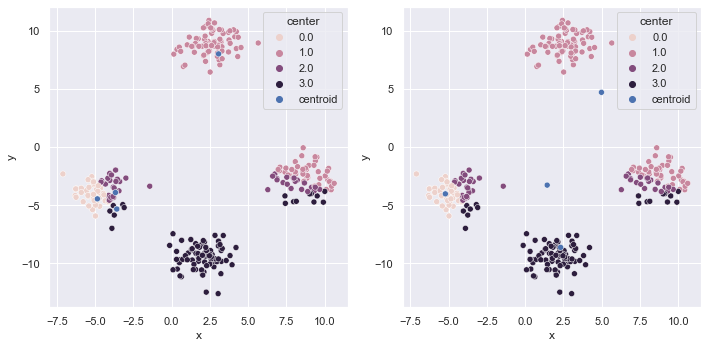

In [18]:
f, axes = plt.subplots(1, 2)
df[['distance', 'center']] = df.apply(lambda row: euclidian_distance(centers,row), axis=1, result_type="expand")
#plot before move_center
sns.scatterplot(x='x',y='y',hue='center',data=df,ax=axes[0])
sns.scatterplot(x='x',y='y',hue='center',data=centers,ax=axes[0])

centers[['x','y']]=df.groupby('center').mean()[['x','y']]
#plot after move_center
sns.scatterplot(x='x',y='y',hue='center',data=df,ax=axes[1]) 
sns.scatterplot(x='x',y='y',hue='center',data=centers,ax=axes[1])


          x         y
0 -4.588790 -3.967252
1  2.607081  8.854017
2  8.663321 -2.761010
3  2.009661 -9.485475


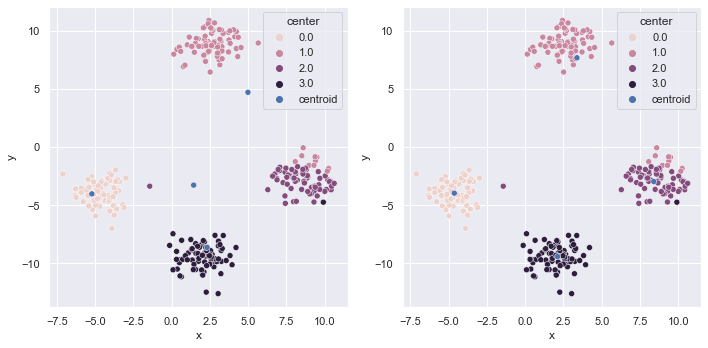

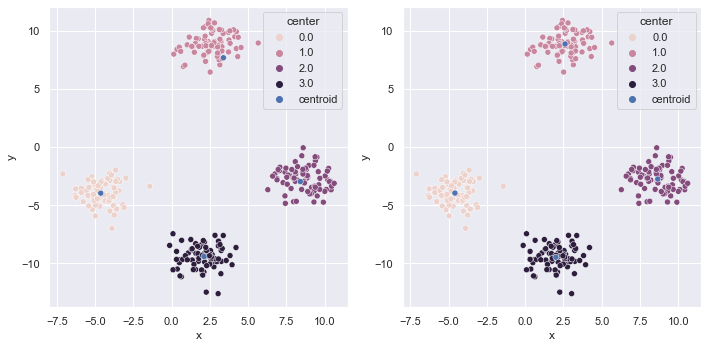

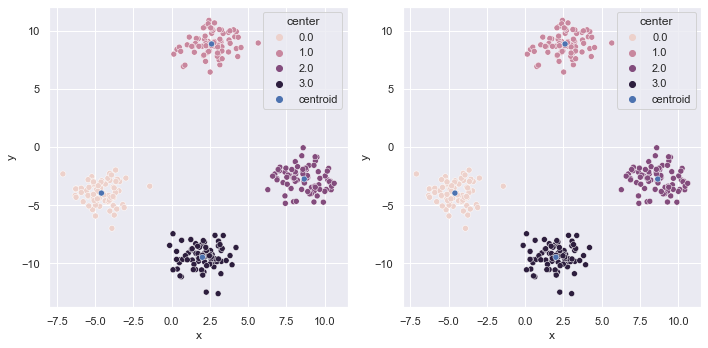

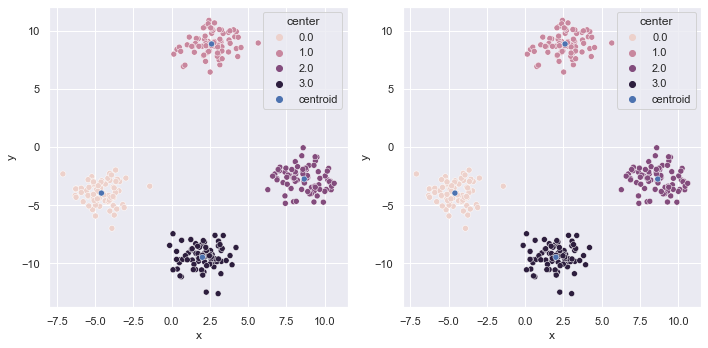

In [19]:

obj_val=df.groupby('center').sum()['distance'].sum()
obj_vals=[obj_val]
obj_val_difference=100
while obj_val_difference>0.000001:
    f, axes = plt.subplots(1, 2)
    df[['distance', 'center']] = df.apply(lambda row: euclidian_distance(centers,row), axis=1, result_type="expand")
    sns.scatterplot(x='x',y='y',hue='center',data=df,ax=axes[0])
    sns.scatterplot(x='x',y='y',hue='center',data=centers,ax=axes[0])
    centers[['x','y']]=df.groupby('center').mean()[['x','y']]
    sns.scatterplot(x='x',y='y',hue='center',data=df,ax=axes[1]) 
    sns.scatterplot(x='x',y='y',hue='center',data=centers,ax=axes[1])
    next_obj_val=df.groupby('center').sum()['distance'].sum()
    obj_val_difference=abs(obj_val-next_obj_val)
    obj_val=next_obj_val
    obj_vals.append(obj_val)
print(centers[['x','y']])

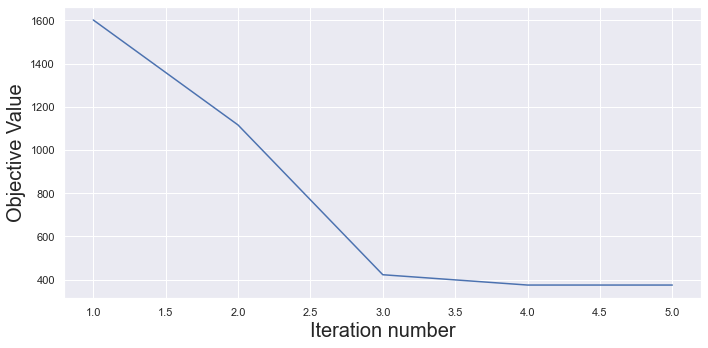

In [20]:
p=sns.lineplot(x=[a+1 for a in list(range(len(obj_vals)))],y=obj_vals)
p.set_xlabel("Iteration number", fontsize = 20)
p.set_ylabel("Objective Value", fontsize = 20)
sns.set(rc={'figure.figsize':(10,10)})

# K-Means Algorithm (sklearn)

In [21]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K).fit(df[['x','y']])
centroids = kmeans.cluster_centers_

df['center']=kmeans.labels_.astype(float)
centers = pd.DataFrame(centroids, columns =['x', 'y'])
centers['center']='Center'
df=pd.concat([df,centers])
sns.set(rc={'figure.figsize':(5,5)})

[[-4.58878987 -3.96725224]
 [ 8.66332079 -2.76101005]
 [ 2.6070812   8.85401693]
 [ 2.00966142 -9.485475  ]]


<AxesSubplot:xlabel='x', ylabel='y'>

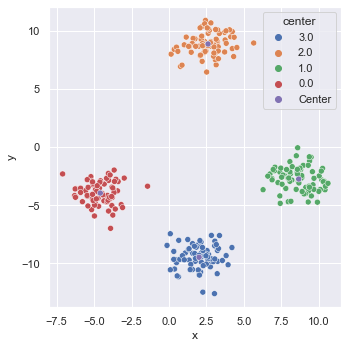

In [22]:
print(centroids)
sns.scatterplot(x='x',y='y',hue='center',data=df)